In [1]:
%matplotlib inline

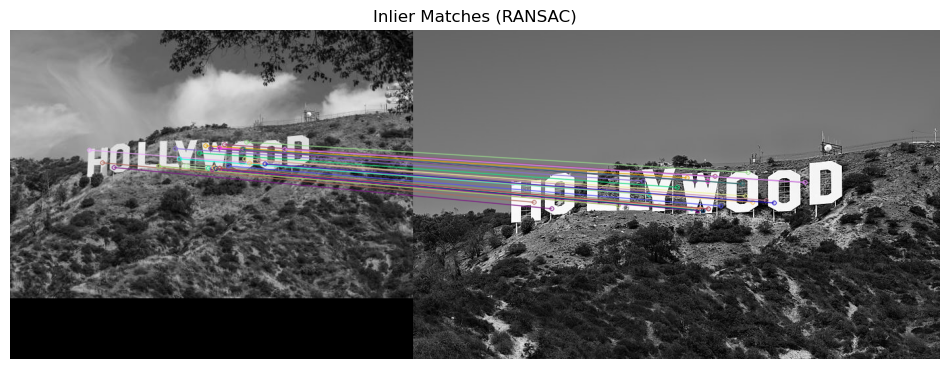

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale images
img1 = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('image2.jpg', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)


src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)


matchesMask = mask.ravel().tolist()
inlier_matches = [m for i, m in enumerate(good_matches) if matchesMask[i]]

result = cv2.drawMatches(img1, kp1, img2, kp2, inlier_matches, None, flags=2)

# Show
plt.figure(figsize=(12, 6))
plt.imshow(result)
plt.axis('off')
plt.title('Inlier Matches (RANSAC)')
plt.show()
